<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> K-means Clustering </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Architecture Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
1. Initialization:<br><br>
- Suppose we have a data set containing N data points, each represented by a feature vector x. We also specify the number of clusters K we want to form. - Randomly initialize K centroids denoted by μ₁, μ₂, ..., μₖ.<br><br>
2. Iteration:<br><br>
- K-means Assignment:<br>
- For each data point xᵢ, calculate the distance to each centroid μⱼ using a distance metric such as Euclidean distance. - Assign xᵢ to the minimum distance centroid. That is, assign H. xᵢ to cluster Cⱼ. where Cⱼ represents the set of data points associated with the centroid μⱼ.<br><br>
- K-means update:<br>
- After assigning all data points to clusters, update the centroids by computing the mean (centroid) of the data points within each cluster. This is done for each centroid μⱼ using the formula:<br>
μⱼ = (1 / |Cⱼ|) * Σ xᵢ, for all xᵢ in cluster Cⱼ.<br><br>
3. Convergence check:<br><br>
- Check if the centroids have converged. H. Whether the focus has stopped moving significantly. This can be determined by comparing the updated centroid to the previous centroid. If the difference is below a predefined threshold, the algorithm is considered converged.<br><br>
4. Finishing:<br><br>
- When the algorithm converges, the final centroid represents the center of the cluster. Each data point belongs to the cluster associated with the closest centroid.<br></div>

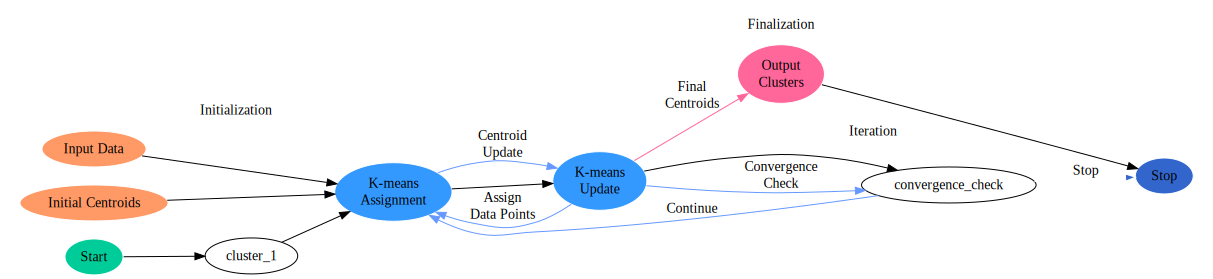

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/KMeans.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
1. Initialization:<br>
   -  This phase represents the algorithms initial configuration. It consists of two parts::<br>
     - Input Data:  This is the dataset that will be used for clustering. It might be a collection of data points with various characteristics.<br>
     - Initial Centroids: These are the centroids starting locations. Centroids are representative points used to create clusters.<br>
<br>
2. Iteration:<br>
   - The main iterative process of the K-means algorithm is represented by this phase. It consists of two steps that must be performed until convergence is reached:<br>
     - K-means Assignment: Each data point is allocated to the closest centroid in this stage. Each data points distance from all centroids is determined, and the data point is assigned to the centroid with the shortest distance.<br>
     - K-means Update: This step updates the centroids based on the assigned data points. Updated centroids are computed as the average of all data points associated with each centroid.<br><br>
3. Convergence Check:<br>
   - After each iteration, the algorithm checks if the centroids have converged. H. Whether it has stopped moving greatly. Once the centroids converge, the algorithm proceeds to the finalization phase. Otherwise, return to the k-means assignment step for another iteration.<br><br>
4. Finalization:<br>
   -  This phase represents the final step of the algorithm after convergence:<br>
     - Final Centroids: These are the positions of the centroids after convergence and represent the final positions of the clusters. <br>
     - Output Clusters: Each data point is associated with the final centroid assigned and forms different clusters based on their proximity to the centroid.<br><br>
5. Start and Stop:<br>
   - The start node indicates the start of the algorithm and the stop node indicates the end of the algorithm when convergence is reached<br>
<br>
In summary, the K-means algorithm iteratively assigns data points to the nearest centroids and updates the centroids until convergence. The final result is a set of clusters represented by the final centroids and their associated data points.<br></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Installing RapidsML cuDF    </div>


In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade wheel

# Add the rapidsai conda channel
!conda config --prepend channels rapidsai

# Install RAPIDS packages
!conda install -y -c rapidsai -c nvidia -c conda-forge cudf cuml dask-cudf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.17.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 5.2.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
Retrieving notices: ...working... done

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
   

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>


In [3]:
import cudf
from cuml.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Load the training and test data:
    </div>


In [4]:
train_transaction_df = cudf.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
train_identity_df = cudf.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_transaction_df = cudf.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_identity_df = cudf.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Select the relevant features for clustering. In this case, we will use numerical features from the transaction data:
    </div>


In [5]:
features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5']


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Preprocess the data by removing missing values and normalizing the features:
    </div>


In [6]:
train_df = train_transaction_df[features].dropna()
train_df_normalized = (train_df - train_df.mean()) / train_df.std()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
    Merge the transaction and identity data on the 'TransactionID' column to generate a seperate eda dataframe</div>


In [7]:
train_df_eda = train_transaction_df.merge(train_identity_df, on='TransactionID', how='left')


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Performing basic data exploration:
    </div>


In [8]:
# Get the summary statistics of numerical columns
numerical_cols = train_df_eda.select_dtypes(include=['float64', 'int64']).columns
summary_stats = train_df_eda[numerical_cols].describe().to_pandas()

# Get the count of missing values in each column
missing_values_count = train_df_eda.isnull().sum().to_pandas()

# Print the summary statistics and missing values count
print('Summary Statistics:')
print(summary_stats)
print('\nMissing Values Count:')
print(missing_values_count)


/opt/conda/lib/python3.10/site-packages/cudf/core/dataframe.py:4945: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/cudf/core/series.py:3133: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


Summary Statistics:
       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25% 

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Plotting the most correlated features after imputation    </div>


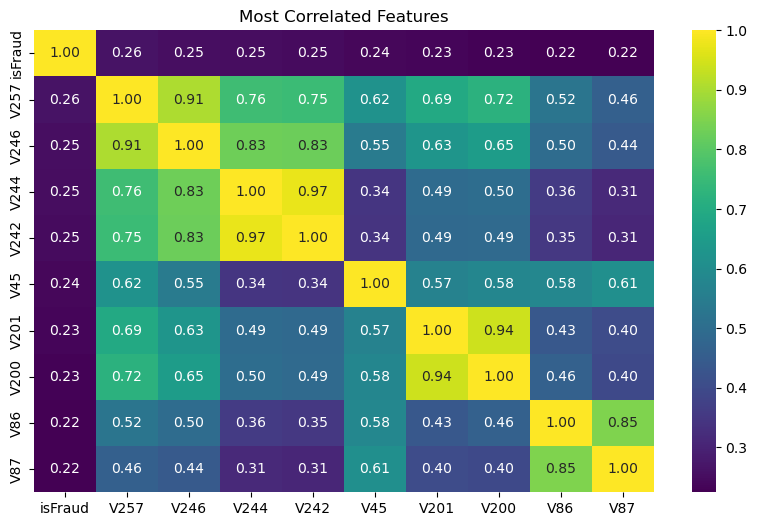

In [9]:
plt.figure(figsize=(10, 6))

# Filter columns to include only numerical data types
numerical_cols = train_df_eda.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the mean
train_df_imputed = train_df_eda[numerical_cols].fillna(train_df_eda[numerical_cols].mean())

# Compute the correlation matrix
corr_matrix = train_df_imputed.corr().to_pandas()

# Filter for the most correlated features with 'isFraud'
most_correlated_features = corr_matrix['isFraud'].sort_values(ascending=False).index[:10]
corr_matrix_filtered = corr_matrix.loc[most_correlated_features, most_correlated_features]

# Plot the filtered correlation matrix using a heatmap
sns.heatmap(corr_matrix_filtered, cmap='viridis', annot=True, fmt='.2f')
plt.title('Most Correlated Features')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Train the K-means clustering algorithm:
    </div>


In [10]:
n_clusters = 2  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train_df_normalized)


KMeans()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Load the test data and preprocess it in the same way as the training data:
    </div>


In [11]:
test_df = test_transaction_df[features].dropna()
test_df_normalized = (test_df - train_df.mean()) / train_df.std()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Predict the cluster labels for the test data:
    </div>


In [12]:
test_labels = kmeans.predict(test_df_normalized)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generate the submission file:
    </div>


In [13]:
submission_df = cudf.DataFrame({'TransactionID': test_transaction_df['TransactionID'], 'isFraud': test_labels})
submission_df.to_csv('submission.csv', index=False)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Load the training and test data:
    </div>


In [14]:
submission_df

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0
